# <font color='blue'>Project 9 Solution Notebook: Twitter US Airline Sentiment</font>
Author: Hubert Foy

Date created: 2022/03/30

Last modified: 2022/04/23

Description: Natural Language Processing

# **Problem Statement**

## Background and Context:

Twitter possesses 330 million monthly active users, which allows businesses to reach a broad population and connect with customers without intermediaries. On the other hand, there’s so much information that it’s difficult for brands to quickly detect negative social mentions that could harm their business.

That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.


Listening to how customers feel about the product/service on Twitter allows companies to understand their audience, keep on top of what’s being said about their brand and their competitors, and discover new trends in the industry.

 

## Data Description:

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

 

## Dataset:

The dataset has the following columns:

- tweet_id                                                           
- airline_sentiment                                               
- airline_sentiment_confidence                               
- negativereason                                                   
- negativereason_confidence                                    
- airline                                                                    
- airline_sentiment_gold                                              
- name     
- negativereason_gold 
- retweet_count
- text
- tweet_coord
- tweet_created
- tweet_location 
- user_timezone
 

## Objective:

To implement the techniques learned as a part of the course.


## Learning Outcomes:

- Basic understanding of text pre-processing.
- What to do after text pre-processing
- Bag of words
- Tf-idf
- Build the classification model.
- Evaluate the Model

## **1. Data Summary**
- Add your view and opinion along with the problem statement, Import the libraries, load dataset, print the shape of data, data description.

## Install and import necessary libraries

In [119]:
# install the modules contractions and unicode
!pip install contractions
!pip install unidecode

In [149]:
# import the libraries
import re, string, random, os                           # Import Regex and string
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.
import unicodedata                                      # Removing accented characters
import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import seaborn as sns                                   # Import seaborn
import matplotlib.pyplot as plt
import nltk                                             # Import Natural Language Tool-Kit.
import spacy

import plotly.express as px
import plotly.figure_factory as ff

nltk.download('stopwords')                              # Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer. For removing stem words

from plotly import graph_objs as go

from collections import Counter

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from spacy.util import compounding
from spacy.util import minibatch
from textblob import TextBlob

from nltk.stem import LancasterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from mlxtend.plotting import plot_confusion_matrix

from imblearn.over_sampling import SMOTE
from IPython.display import display

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline   

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Mount Google Drive files in Google Colab

In [121]:
# Mount your Google Drive at the specified mountpoint path.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [122]:
# Return a unicode string representing the current working directory
import os
os.getcwd()

'/content/drive/My Drive/Colab Notebooks/Project9'

In [123]:
# change the OS to use your project folder in google drive as the working directory. This way, if your notebook times out,
# your files will be saved in your Google Drive!
os.chdir('/content/drive/MyDrive/Colab Notebooks/Project9')
# Verify directory is changed successfully
os.getcwd() # !pwd returns current working directory. 

'/content/drive/MyDrive/Colab Notebooks/Project9'

## Activate Interactive Table for Pandas DataFrame

In [124]:
# Activate Interactive Table that is a colab extension that enhances the rendering and exploration of DataFrame
from google.colab import data_table
data_table.enable_dataframe_formatter() #invoke the associated enble method on the data set

## Load dataset

In [125]:
# Read a comma-separated values (csv) file into Python Pandas DataFrame and assign it to a variable
data=pd.read_csv('Tweets.csv')
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [126]:
print("There are {} observations and {} features in this dataset. \n".format(data.shape[0],data.shape[1]))

print("There are {} types of sentiments in this dataset such as {}... \n".format(len(data['airline_sentiment'].unique()), ", ".join(data['airline_sentiment'].unique()[0:5])))

print("There are {} airlines that air passengers mentioned in this dataset such as {}... \n".format(len(data['airline'].unique()), ", ".join(data['airline'].unique()[0:5])))

There are 14640 observations and 15 features in this dataset. 

There are 3 types of sentiments in this dataset such as neutral, positive, negative... 

There are 6 airlines that air passengers mentioned in this dataset such as Virgin America, United, Southwest, Delta, US Airways... 



## Print the shape of the data

In [127]:
data.shape

(14640, 15)

- Observation: DataFrame comprise of 14,640 examples and 15 features.


## Data description

In [128]:
# Print a concise summary of the DataFrame 'tweet'
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [129]:
data.dtypes

tweet_id                          int64
airline_sentiment                object
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline                          object
airline_sentiment_gold           object
name                             object
negativereason_gold              object
retweet_count                     int64
text                             object
tweet_coord                      object
tweet_created                    object
tweet_location                   object
user_timezone                    object
dtype: object

In [130]:
data.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

### Checking if data is duplicated and removing duplicates

In [131]:
# Check for duplicate rows
duplicateRowsDF = data[data.duplicated()]
print(duplicateRowsDF.head())

                 tweet_id airline_sentiment  airline_sentiment_confidence  \
12040  570308309682675712          negative                           1.0   
12059  570305051819941889           neutral                           1.0   
12063  570303383782989824           neutral                           1.0   
12066  570301929580048385           neutral                           1.0   
12068  570301395141836801          negative                           1.0   

               negativereason  negativereason_confidence   airline  \
12040  Customer Service Issue                        1.0  American   
12059                     NaN                        NaN  American   
12063                     NaN                        NaN  American   
12066                     NaN                        NaN  American   
12068             Late Flight                        1.0  American   

      airline_sentiment_gold            name negativereason_gold  \
12040                    NaN      SweeLoTmac    

In [132]:
print(duplicateRowsDF.shape)  

(36, 15)


- There are 36 duplicate rows

In [133]:
# Drop the duplicate rows
data.drop_duplicates(keep=False,inplace=True) 

In [134]:
print(data.shape)

(14568, 15)


- There are 14568 rows and 15 columns after dropping 36 duplicate rows from the initial load dataset

In [135]:
data.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.456800e+04,14568.000000,10484.000000,14568.000000
mean,5.692131e+17,0.899675,0.636987,0.082921
std,7.773880e+14,0.163080,0.330318,0.747520
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685551e+17,0.691975,0.360300,0.000000
50%,5.694655e+17,1.000000,0.670400,0.000000
75%,5.698859e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [136]:
# Groupby by airline
airlines = data.groupby("airline")

# Summary statistic of all airlines
airlines.describe().head()

tweet_id                                                          \
              count          mean           std           min           25%   
airline                                                                       
American     2687.0  5.699020e+17  2.309522e+14  5.682651e+17  5.696831e+17   
Delta        2222.0  5.690478e+17  7.760069e+14  5.675883e+17  5.684140e+17   
Southwest    2420.0  5.689358e+17  7.965088e+14  5.675944e+17  5.681877e+17   
US Airways   2913.0  5.691208e+17  7.676358e+14  5.676433e+17  5.684797e+17   
United       3822.0  5.690949e+17  7.515777e+14  5.675915e+17  5.684908e+17   

                                                      \
                     50%           75%           max   
airline                                                
American    5.698924e+17  5.700806e+17  5.703081e+17   
Delta       5.691760e+17  5.696792e+17  5.703093e+17   
Southwest   5.689135e+17  5.696390e+17  5.703092e+17   
US Airways  5.693176e+17  5.697157e+17  5.703106e+17   
United      5.692193e+17  5.697103e+17  5.703079e+17   

           airline_sentiment_confidence            ...  \
                                  count      mean  ...   
airline                                            ...   
American                         2687.0  0.915137  ...   
Delta                            2222.0  0.869878  ...   
Southwest                        2420.0  0.886516  ...   
US Airways                       2913.0  0.921578  ...   
United                           3822.0  0.900878  ...   

           negativereason_confidence      retweet_count                      \
                                 75%  max         count      mean       std   
airline                                                                       
American                         1.0  1.0        2687.0  0.042799  0.307561   
Delta                            1.0  1.0        2222.0  0.113411  1.074325   
Southwest                        1.0  1.0        2420.0  0.059917  0.549460   
US Airways                       1.0  1.0        2913.0  0.085479  1.172269   
United                           1.0  1.0        3822.0  0.110152  0.368416   

                                      
            min  25%  50%  75%   max  
airline                               
American    0.0  0.0  0.0  0.0   5.0  
Delta       0.0  0.0  0.0  0.0  31.0  
Southwest   0.0  0.0  0.0  0.0  22.0  
US Airways  0.0  0.0  0.0  0.0  44.0  
United      0.0  0.0  0.0  0.0   7.0  

[5 rows x 32 columns]

In [137]:
# top five airlines among the six airlines
airlines.mean().sort_values(by="tweet_id",ascending=False).head()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
airline,,,,
American,5.699020e+17,0.915137,0.660549,0.042799
US Airways,5.691208e+17,0.921578,0.687172,0.085479
United,5.690949e+17,0.900878,0.627285,0.110152
Delta,5.690478e+17,0.869878,0.573097,0.113411
Virgin America,5.690295e+17,0.876086,0.556985,0.051587


## **2. Exploratory data analysis**
Do Exploratory data analysis(EDA) based on the below statement. 
- a. Plot the distribution of all tweets among each airline & plot the distribution of sentiment across all the tweets. 
- b. Plot the distribution of Sentiment of tweets for each airline & plot the distribution of all the negative reasons. 
- c. Plot the word cloud graph of tweets for positive and negative sentiment separately. Mention the observations & insights after plotting each graph.

### Plot the distribution of all tweets among each airline & plot the distribution of sentiment across all the tweets.

In [138]:
# number of airline classes
data['airline'].nunique()

6

In [139]:
# airline classes using Pandas unique method
data['airline'].unique()

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

In [140]:
# airline class distribution using Pandas value_counts() method
data['airline'].value_counts(sort=False)

Virgin America     504
United            3822
Southwest         2420
Delta             2222
US Airways        2913
American          2687
Name: airline, dtype: int64

In [141]:
# returns an array of index names from a Pandas Series only
data['airline'].value_counts(sort=False).index

Index(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'],
      dtype='object')

In [142]:
# returns an array of values from a Pandas Series only
data['airline'].value_counts(sort=False).values

array([ 504, 3822, 2420, 2222, 2913, 2687])

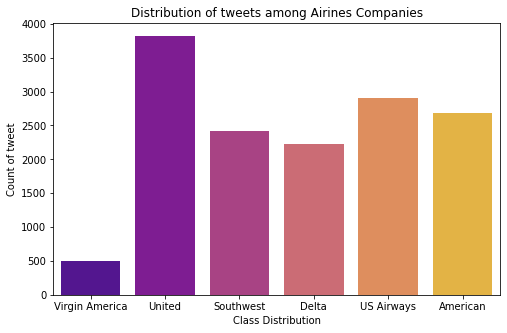

In [143]:
# Plot the distribution of sentiment across all the tweets
plt.figure(figsize=(8,5))
colors='plasma'
sns.barplot(x=data['airline'].value_counts(sort=False).index, y=data['airline'].value_counts(sort=False).values, palette=colors)
plt.title('Distribution of tweets among Airines Companies')
plt.xlabel("Class Distribution")
plt.ylabel("Count of tweet")
plt.show()

### Plot the distribution of sentiment across all the tweets

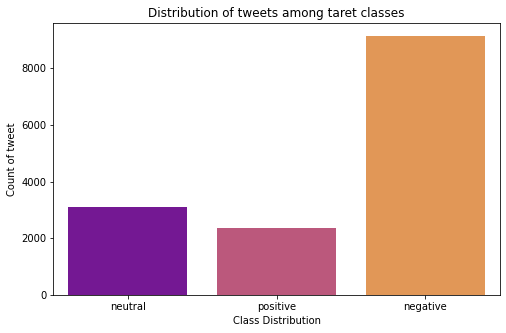

In [144]:
# Plot the distribution of sentiment across all the tweets
plt.figure(figsize=(8,5))
colors='plasma'
sns.barplot(x=data['airline_sentiment'].value_counts(sort=False).index, y=data['airline_sentiment'].value_counts(sort=False).values, palette=colors)
plt.title('Distribution of tweets among taret classes')
plt.xlabel("Class Distribution")
plt.ylabel("Count of tweet")
plt.show()

Observations:
- Majorities are negative, and it would be great/free feedback to airlines to provide appropriate responses. 
- We can also show sentiments for each airline.
- It also shows that the class distribution is imbalanced and our model may not generalize well with unseen data. Therefore, we could use one of the optimization techniques to balance the target classes. 

### Plot the distribution of Sentiment of tweets for each airline & plot the distribution of all the negative reasons.

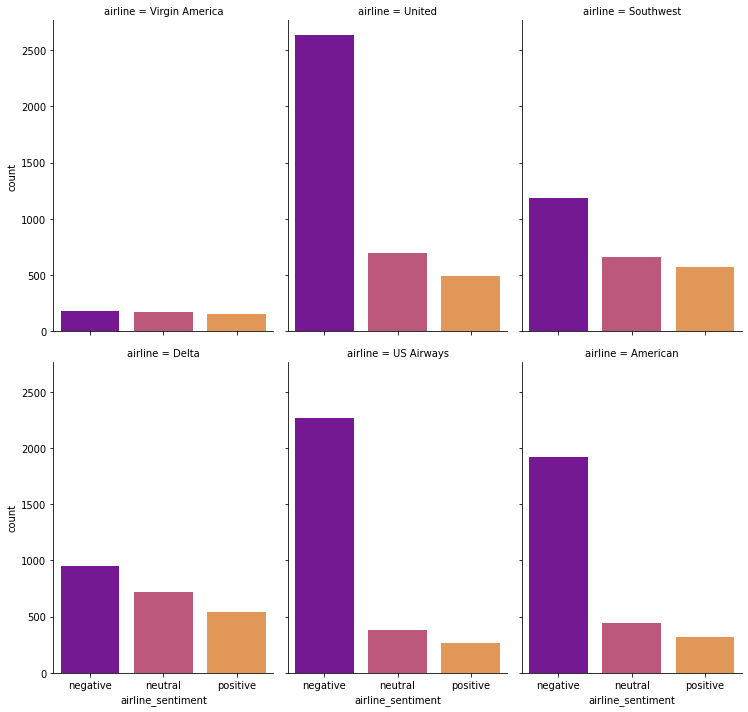

In [145]:
# Plot the distribution of Sentiment of tweets for each airline
g = sns.FacetGrid(data, col='airline', col_wrap=3, height=5, aspect =0.7) # Multi-plot grid for plotting conditional relationships.
g = g.map(sns.countplot, 'airline_sentiment', order =data.airline_sentiment.value_counts().index, palette= 'plasma') 
plt.show()

- Here we can see that United Airlines, US Airways, American Airlines has the most number of negative review
- Virgin America has the least number of negative reviews

Customer Service Issue         2898
Late Flight                    1655
Can't Tell                     1190
Cancelled Flight                839
Lost Luggage                    718
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     479
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64


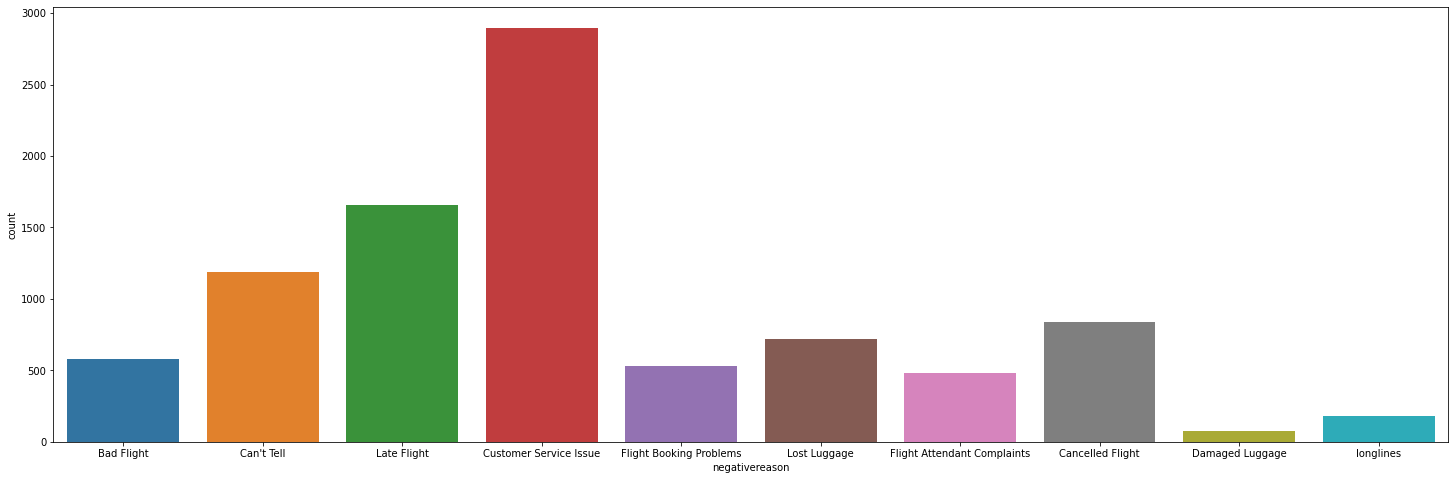

In [146]:
# Plot the distribution of all the negative reasons
y = data['negativereason']
print(y.value_counts())
plt.figure(figsize=(25,8)) 
g = sns.countplot(y)

- Customer service and Late flight seems to be the main reason why customers are giving bad feedback

### Plot the word cloud graph of tweets for positive and negative sentiment separately

In [239]:
# Function for the three types of wordclouds: Positive Tweets, Negative Tweets and Neutral Tweets
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), color = 'white',
                   title = None, title_size=40, image_color=False):
    
    wordcloud = WordCloud(background_color=color,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=400, 
                    height=200,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
d = data["text"]

In [ ]:
# Plot the word cloud graph of tweets for Negative sentiment
plot_wordcloud(Negative_sent)

- So we see that overall the tweets are neutral in nature, followed by negative sentiment for the time in which they are analysed.

In [ ]:
# Plot the word cloud graph of tweets for positive sentiment
plot_wordcloud(Positive_sent)

In [ ]:
Positive_sent = data[data['sentiment']=='positive']
Negative_sent = data[data['sentiment']=='negative']
Neutral_sent = data[data['sentiment']=='neutral']
print('Number of tweets with positive sentiment', Positive_sent['sentiment'].count())
print('Number of tweets with negative sentiment', Negative_sent['sentiment'].count())
print('Number of tweets with neutral sentiment', Neutral_sent['sentiment'].count())

- We can observe that the first review mentioned a lot about VirginAmerica and the said in the POS.

### **Observations & Insights on EDA**
- There are 14640 rows and 15 columns in the tweet data
- There are 36 duplicate records in the data set
- Here we can see that United Airlines, US Airways, American Airlines has the most number of negative review
- Virgin America has the least number of negative reviews
- Customer service and Late flight seems to be the main reason why customers are giving bad feedback

## **3. Understanding of Data Columns**
Understand of data columns:  
- a. Drop all other columns except “text” and “airline_sentiment”. 
- b. Check the shape of the data. 
- c. Print the first 5 rows of data.

### Drop all other columns except “text” and “airline_sentiment”

In [163]:
data.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [164]:
# Let us now remove irrelevant columns
df = data.drop(['tweet_id', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count','tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'], axis =1)

In [165]:
# Shape of Data
df.shape

(14568, 2)

In [166]:
# Printing first 5 rows of data
df.head(5)

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


- There are 14568 rows and 2 columns (This is result of keeping relevant rows and duplicate data cleanup)

In [167]:
# Class distribution in the target variable
print(df.airline_sentiment.value_counts())

negative    9140
neutral     3083
positive    2345
Name: airline_sentiment, dtype: int64


- We observe that the class distribution in the target variable is highly inblanced such that our model cannot generalize well in with unseen data. We will use one of the resampling techniques to balance the class distribution in the target variable. Also, we will remove the neutral sentiment, given that the negative and positive sentinents matter more. 

In [168]:
#removing the neutral sentiments considering that positive and negative sentiments matter more 
df=df[df['airline_sentiment']!='neutral']
#now since neutral elements are deleted so I need to reset the indices
df.reset_index(inplace=True,drop=True)
#positive sentiments to 1 and negative to 0 
def partition(x):
    if x =='positive':
        return 1
    return 0
actualSentiment = df['airline_sentiment']
positiveNegative = actualSentiment.map(partition) 
df['Sentiment'] = positiveNegative
df['Sentiment'].value_counts() 

0    9140
1    2345
Name: Sentiment, dtype: int64

In [169]:
df.head()

,airline_sentiment,text,Sentiment
0,positive,@VirginAmerica plus you've added commercials t...,1
1,negative,@VirginAmerica it's really aggressive to blast...,0
2,negative,@VirginAmerica and it's a really big bad thing...,0
3,negative,@VirginAmerica seriously would pay $30 a fligh...,0
4,positive,"@VirginAmerica yes, nearly every time I fly VX...",1


## **4. Text pre-processing: Data preparation.**
 

**NOTE:-** Each text pre-processing step should be mentioned in the notebook separately. We perform preprocessing tasks in two groups and in order. First, we apply the functions to remove html tags, followed by replacing contractions, then remove accented characters and finally remove number. This is performed on the DataFrame before tokenization and the remaining text preprocessing activities, which constitute the second group. 

- a. Html tag removal. 
- b. Tokenization. 
- c. Remove the numbers. 
- d. Removal of Special Characters and Punctuations. 
- e. Removal of stopwords 
- f. Conversion to lowercase. 
- g. Lemmatize or stemming. 
- h. Join the words in the list to convert back to text string in the data frame. (So that each row contains the data in text format.) 
- i. Print the first 5 rows of data after pre-processing.

**Group 1:** Perform the operations irrespective of whether the issues are there because it is challenging to observe the aspects in larage data. 

**Html tag removal**

In [170]:
#Function to Remove HTML Tags in original text
def strip_html(text):
    
    """1. Replace html tags in the Text"""
    
    NewText = BeautifulSoup(text, "html.parser").get_text()
    
    return NewText

**Replace Contraction**

In [171]:
#Function to Replace Contractions with complete words in original text
def replace_contractions(text):
    
    """Replace contractions in string of text. e.g. don't -> do not"""
    NewText = contractions.fix(text)
    return NewText

**Remove accented characters from text**

In [172]:
#Function to remove Accented Characters using unidecode
#!pip install unidecode
#import unicodedata 

import unidecode

def remove_accented_chars(text):
    
    """Remove accented characters from text, e.g. café"""
    
    NewText = unidecode.unidecode(text)
    
    return NewText


**Removal of Numbers**

In [173]:
#Function to Remove Numbers from the Abstract

def remove_numbers(text):
    """Removing Numbers using Regular Expression"""
    text = re.sub(r'\d+', '', text)
    
    return text

In [174]:
# Apply the finctions on the DataFrame

df['text'] = df['text'].apply(lambda x: strip_html(x))
df['text'] = df['text'].apply(lambda x: replace_contractions(x))
df['text'] = df['text'].apply(lambda x: remove_accented_chars(x))
df['text'] = df['text'].apply(lambda x: remove_numbers(x))

In [175]:
# Print first five rows
df.head()

,airline_sentiment,text,Sentiment
0,positive,@VirginAmerica plus you have added commercials...,1
1,negative,@VirginAmerica it is really aggressive to blas...,0
2,negative,@VirginAmerica and it is a really big bad thin...,0
3,negative,@VirginAmerica seriously would pay $ a flight ...,0
4,positive,"@VirginAmerica yes, nearly every time I fly VX...",1


**Group 2:** First perform tokenization because the rest of the preprocessing activities are performed on tokens.

**Tokenization**

In [176]:
# Tokenization of data
df['text'] = df.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) 
# Print the first five rows of the tokenized DataFrame
df.head()

,airline_sentiment,text,Sentiment
0,positive,"[@, VirginAmerica, plus, you, have, added, com...",1
1,negative,"[@, VirginAmerica, it, is, really, aggressive,...",0
2,negative,"[@, VirginAmerica, and, it, is, a, really, big...",0
3,negative,"[@, VirginAmerica, seriously, would, pay, $, a...",0
4,positive,"[@, VirginAmerica, yes, ,, nearly, every, time...",1


**Remove special characters and punctuations**

In [177]:
# Function to remove Special Characters and Punctuations
def remove_special_character_punctuation(list_of_words): 
    pattern = '[^A-Za-z0-9]+'
    list = [re.sub(pattern, '', i) for i in list_of_words] 
    return list

**Removal of stopwords**

In [178]:
# download a file with English stopwords
import nltk
nltk.download('stopwords')

# verifying the stopwords have been downloaded and imported successfully
from nltk.corpus import stopwords
#stopwords.words('english')
#stopwords.words()[::3]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [179]:
# create an english stopword object
stopwords = stopwords.words('english')

#Function to remove Stop words
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []   
    for word in words:  
        if word not in stopwords:
            #Append Tokens not falling under stopwords
            new_words.append(word)
    return new_words

**Conversion to Lower case**

In [180]:
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = word.lower()           # Converting token to lowercase
        new_words.append(new_word)        # Append processed procesed token back to new list.
    return new_words

**Stemming**

In [181]:
def stem_words(words):

    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
     
    stems = []             # Create empty list to store tokens post stemming words              
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)                # Append processed words to new list.
    return ' '.join(stems)    #Join the words in the list to convert back to text string in the dataframe



**Lemmatization**

In [182]:
def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()      #Creating Object for Word Net Lemmatizer
    lemmas = []                           # Create empty list to store pre-processed words.
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)              # Append processed words to new list.
    return lemmas

**Remove non ASCII words**

In [183]:
#Function to remove non ASCII words
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        #Encode & Decode Tokens to UTF-8
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        #Append Tokens Back
        new_words.append(new_word)
    return new_words

**Remove empty String**

In [184]:
def remove_empty_string(words):
  return list(filter(None, words))

**Complete Pre-preocessing**

In [185]:
#Function to call all functions and finally join the tokens back
def clean_data(words):
    #Function Call
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_special_character_punctuation(words)
    words = remove_stopwords(words)
    #words = stem_words(words)
    words = lemmatize_verbs(words)
    words =  remove_empty_string(words)
    return words

In [186]:
df['text'] = df['text'].apply(lambda x: clean_data(x))

In [187]:
#Visualize preprocessed Text
df.head()

,airline_sentiment,text,Sentiment
0,positive,"[virginamerica, plus, add, commercials, experi...",1
1,negative,"[virginamerica, really, aggressive, blast, obn...",0
2,negative,"[virginamerica, really, big, bad, thing]",0
3,negative,"[virginamerica, seriously, would, pay, flight,...",0
4,positive,"[virginamerica, yes, nearly, every, time, fly,...",1


In [ ]:
# # show which stop words have been removed
# from nltk.corpus import stopwords
# en_stops = list(stopwords.words('english'))

# all_words = list(df['text'])
# for word in all_words: 
#     if word not in en_stops:
#         print(word)

**Join the words in the list to convert back to text string in the dataframe**

In [190]:
# convert string to list of tokens
import nltk
nltk.download('averaged_perceptron_tagger')

for i, row in df.iterrows():
    
    sentence=str(df.at[i,'text'])
    
    tagged_sentence = nltk.tag.pos_tag(sentence.split())
    
    edited_sentence = [word for word,tag in tagged_sentence if tag != 'NNP' and tag != 'NNPS']
    
    df.at[i,'text']=(' '.join(edited_sentence))
    
#df.head()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


**Print the first five rows of the DataFrame after preprocessing**

In [189]:
df.head()

,airline_sentiment,text,Sentiment
0,positive,"['virginamerica', 'plus', 'add', 'commercials'...",1
1,negative,"['virginamerica', 'really', 'aggressive', 'bla...",0
2,negative,"['virginamerica', 'really', 'big', 'bad', 'thi...",0
3,negative,"['virginamerica', 'seriously', 'would', 'pay',...",0
4,positive,"['virginamerica', 'yes', 'nearly', 'every', 't...",1


**Handling Missing Values**

In [191]:
df.isna().sum()

airline_sentiment    0
text                 0
Sentiment            0
dtype: int64

## **6. Modelling , tuning and Evaluation**
- Fit the model using vectorized column 
- Tune the model to improve the accuracy 
- Evaluate the model using the confusion matrix 
- Target the final score >= 75% 
- Print the top 40 features and plot their word cloud using both types of vectorization. 

## **Modeling Building using Classifier implementing the k-nearest neighbors vote.**

## **5. Vectorization**
Convert text data to numbers.

- a. Use CountVectorizer. 
- b. Use TfidfVectorizer. 
- Apply count vectorizer, Tf-IDF vectorizer, on the required text column to make it suitable for fitting the model

### **KNN on CountVectorizer**

In [192]:
#training involves our clean text as independent varaible and the predicted sentiments as the dependent variable 
X = np.array(df['text'])
Y = np.array(df['Sentiment'])
# splitting into train-test-validation set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.33, random_state=0)
X_tr, X_cv, Y_tr, Y_cv = train_test_split(X_train, Y_train, test_size=.2, random_state=0)

In [193]:
#looking at the shapes of each of the training, test and validation sets
print('X_train, Y_train', X_train.shape, Y_train.shape)
print('X_test, Y_test', X_test.shape, Y_test.shape)
print('X_tr, Y_tr', X_tr.shape, Y_tr.shape)
print('X_cv, Y_cv', X_cv.shape, Y_cv.shape)

X_train, Y_train (7694,) (7694,)
X_test, Y_test (3791,) (3791,)
X_tr, Y_tr (6155,) (6155,)
X_cv, Y_cv (1539,) (1539,)


In [194]:
from sklearn.neighbors import KNeighborsClassifier
#uses training and cross validation sets for hyperparamter tuning
def KNN(X_train,X_cv,Y_train,Y_cv,algo):
    k = []
    max_k = 0
    #appending auc scores of cross validation and training set in the below arrays respectively
    pred_cv = []
    pred_train = []
    max_roc_auc=-1
    for i in range(1,30,2):
        if algo == 'brute':
            knn =KNeighborsClassifier(n_neighbors=i,algorithm='brute') 
        else:
            knn =KNeighborsClassifier(n_neighbors=i,algorithm='kd_tree')
        knn.fit(X_train,Y_train)
        probs = knn.predict_proba(X_cv)
        prob = knn.predict_proba(X_train)
        # keep probabilities for the positive outcome only
        probs = probs[:, 1]
        prob  = prob[:, 1]
        auc_score_test = roc_auc_score(Y_cv,probs)   #find AUC score
        auc_score_train = roc_auc_score(Y_train,prob)
        print(i," ------> ",auc_score_test)
        pred_cv.append(auc_score_test)
        pred_train.append(auc_score_train)
        k.append(i)
        if(max_roc_auc<auc_score_test):
            max_roc_auc=auc_score_test
            max_k=i
    print('\nThe optimal number of neighbors is %d.' % max_k)
    plt.plot(k, pred_cv,'r-', label = 'CV Data')
    plt.plot(k,pred_train,'g-', label ='Train Data')
    plt.legend(loc='upper right')
    plt.title("K v/s Auc Score")
    plt.ylabel('Auc Score')
    plt.xlabel('K')
    plt.show()
    # calculate roc curve
    fpr, tpr, thresholds = roc_curve(Y_cv,probs)
    # plot no skill curve
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    plt.plot(fpr, tpr, marker='.')
    #plt.plot(k,pred_cv)
    plt.title("Line Plot of ROC Curve")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [195]:
#The below two lists are created to store auc and f1 scores respectively for all the vectorizations we are going to use 
AUC,F1=[],[]
def testing(X_train,Y_train,X_test,Y_test,algo,optimal_k):
    if algo == 'brute':
        knn =KNeighborsClassifier(n_neighbors=optimal_k,algorithm='brute') 
    else:
        knn =KNeighborsClassifier(n_neighbors=optimal_k,algorithm='kd_tree')
    knn.fit(X_train,Y_train)
    probs = knn.predict_proba(X_test) 
    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    print("AUC Score",roc_auc_score(Y_test,probs))
    AUC.append(round(roc_auc_score(Y_test,probs),2))
    # calculate roc curve
    fpr, tpr, thresholds = roc_curve(Y_test,probs)
    # plot no skill
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    plt.plot(fpr, tpr, marker='.')
    plt.title("Line Plot of ROC Curve on Test Data")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')    
    plt.show()
    prediction=knn.predict(X_test)
    cm=confusion_matrix(Y_test,prediction)
    cm1 = pd.DataFrame(cm , index = ['positive','negative'] , columns = ['positive','negative'])
    plt.figure(figsize = (10,10))
    ax=sns.heatmap(cm1,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')
    ax.set(xlabel="Actual Sentiment", ylabel = "Predicted Sentiment")
    #printing f1 score and hamming loss
    print("f1 score for data :",metrics.f1_score(Y_test, prediction))
    F1.append(round(metrics.f1_score(Y_test, prediction),2))
    print("hamming loss for data:",metrics.hamming_loss(Y_test,prediction))
    print("Precision recall report for data:\n",metrics.classification_report(Y_test, prediction))

In [196]:
#Bag Of Words Vectorization with unigrams and bigrams
count_vect = CountVectorizer(ngram_range=(1,2)) #in scikit-learn
# In below line we get a Bag of Word model that has cleaned the text, removing non-aphanumeric characters and stop words by the fitting part and 
# a matrix where each row represents a specific text in corpus and each column represents a word in vocabulary, that is, all words found in corpus
#from the transform
bow= count_vect.fit(X_tr)
bow_train = bow.transform(X_tr)
sum_words = bow_train.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in bow.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
print("Top 20 words with their frequencies in training set are",words_freq[:20])
print("The type of count vectorizer ",type(bow_train))
print("The shape of out text BOW vectorizer ",bow_train.get_shape())
#print("the number of unique words ", final_counts.get_shape()[1])
bow_cv = count_vect.transform(X_cv)
bow_test = count_vect.transform(X_test)
print("CV Data Size: ",bow_cv.shape)
print("Test Data Size: ",bow_test.shape)

Top 20 words with their frequencies in training set are [('flight', 2215), ('unite', 1852), ('usairways', 1400), ('americanair', 1305), ('get', 969), ('southwestair', 939), ('jetblue', 873), ('thank', 754), ('cancel', 544), ('service', 526), ('delay', 497), ('time', 461), ('help', 419), ('wait', 411), ('call', 402), ('customer', 401), ('bag', 383), ('hold', 374), ('hours', 350), ('go', 349)]
The type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
The shape of out text BOW vectorizer  (6155, 46581)
CV Data Size:  (1539, 46581)
Test Data Size:  (3791, 46581)


In [197]:
#Normalize bow data for effective model training
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer
bow_train=preprocessing.normalize(bow_train)
bow_cv=preprocessing.normalize(bow_cv)
bow_test=preprocessing.normalize(bow_test)
print("The shape of out text BOW vectorizer ",bow_train.get_shape())
print("CV Data Size: ",bow_cv.shape)
print("Test Data Size: ",bow_test.shape)

The shape of out text BOW vectorizer  (6155, 46581)
CV Data Size:  (1539, 46581)
Test Data Size:  (3791, 46581)


In [198]:
#importing libraries for model evaluation and algorithms
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from IPython.display import display
import warnings
warnings.filterwarnings("ignore")
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import  MultinomialNB
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

1  ------>  0.788487391996133
3  ------>  0.8715257497331373
5  ------>  0.8960695655676623
7  ------>  0.8952312138728323
9  ------>  0.9014898994984994
11  ------>  0.9035152867011742
13  ------>  0.9050384181587481
15  ------>  0.905758443938692
17  ------>  0.9063765080260215
19  ------>  0.9052964693561056
21  ------>  0.9035240982054742
23  ------>  0.9013627620793137
25  ------>  0.9002764294777547
27  ------>  0.8986601478318665
29  ------>  0.8965617510221345

The optimal number of neighbors is 17.


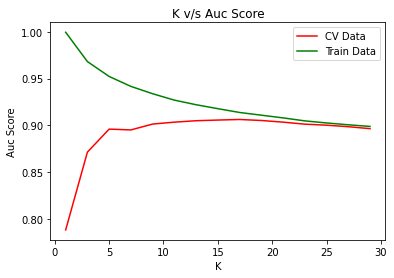

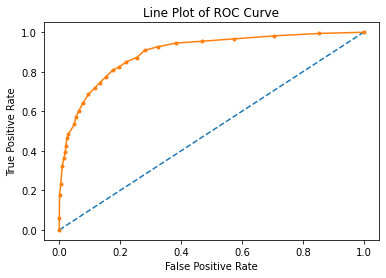

In [199]:
# find optimal alpha for kdtree approach
KNN(bow_train,bow_cv,Y_tr,Y_cv,'kdtree')

AUC Score 0.8875294942522944


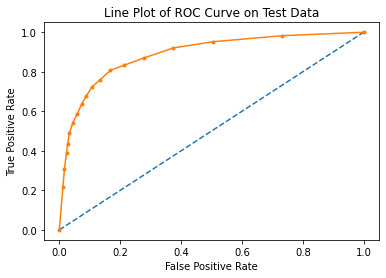

f1 score for data : 0.6733542319749216
hamming loss for data: 0.1374307570561857
Precision recall report for data:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91      2996
           1       0.67      0.68      0.67       795

    accuracy                           0.86      3791
   macro avg       0.79      0.79      0.79      3791
weighted avg       0.86      0.86      0.86      3791



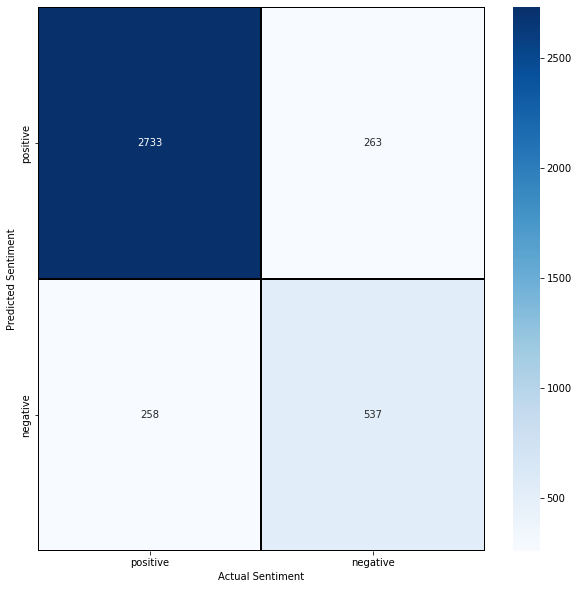

In [205]:
#optimal_k=17 used for testing
testing(bow_train,Y_tr,bow_test,Y_test,'kdtree',optimal_k=17)

## **KNN on TF-IDF Vectorization**

In [201]:
#TF-IDF Vectorization with unigrams and bigrams
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
tfidf_train = tf_idf_vect.fit_transform(X_tr)
features = tf_idf_vect.get_feature_names()
print("some sample features(unique words in the corpus)",features[10000:10010])                                                              
print("The type of count vectorizer ",type(tfidf_train))
print("The shape of out text TFIDF vectorizer ",tfidf_train.get_shape())
tfidf_cv = tf_idf_vect.transform(X_cv)
tfidf_test = tf_idf_vect.transform(X_test)
print("CV Data Size: ",tfidf_cv.shape)
print("Test Data Size: ",tfidf_test.shape)

some sample features(unique words in the corpus) ['delay worst', 'delay worstunitedflightsever', 'delay would', 'delay wout', 'delay wow', 'delay yet', 'delay yxe', 'delayedcancelled', 'delayedcancelled flight', 'delayedcancelled flightled']
The type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
The shape of out text TFIDF vectorizer  (6155, 46581)
CV Data Size:  (1539, 46581)
Test Data Size:  (3791, 46581)


In [202]:
#displaying top 25 tfidf features
def top_tfidf_feats(row, features, top_n=25):
    ''' Get top n tfidf values in row and return them with their corresponding feature names.'''
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

top_tfidf = top_tfidf_feats(tfidf_train[1,:].toarray()[0],features,10)
top_tfidf

,feature,tfidf
0,communicate us,0.400178
1,would communicate,0.400178
2,get wish,0.382213
3,wish would,0.369467
4,communicate,0.344673
5,jetblue get,0.308045
6,wish,0.291966
7,would,0.179220
8,us,0.176579
9,jetblue,0.134167


In [203]:
#Normalize Data for effective model training
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer
tfidf_train=preprocessing.normalize(tfidf_train)
tfidf_cv=preprocessing.normalize(tfidf_cv)
tfidf_test=preprocessing.normalize(tfidf_test)
print("The shape of out text TFIDF vectorizer ",tfidf_train.get_shape())
print("CV Data Size: ",tfidf_cv.shape)
print("Test Data Size: ",tfidf_test.shape)

The shape of out text TFIDF vectorizer  (6155, 46581)
CV Data Size:  (1539, 46581)
Test Data Size:  (3791, 46581)


1  ------>  0.7740365249441099
3  ------>  0.8648403355420837
5  ------>  0.8826911844675837
7  ------>  0.8970577128355924
9  ------>  0.9042944754385611
11  ------>  0.9078719461843668
13  ------>  0.9106400173208998
15  ------>  0.9149249259833638
17  ------>  0.920351553845844
19  ------>  0.9240133632756642
21  ------>  0.9229522064006767
23  ------>  0.9237880405228495
25  ------>  0.9236533503856921
27  ------>  0.9240788201647498
29  ------>  0.9254131336730378

The optimal number of neighbors is 29.


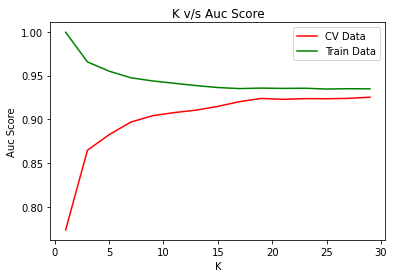

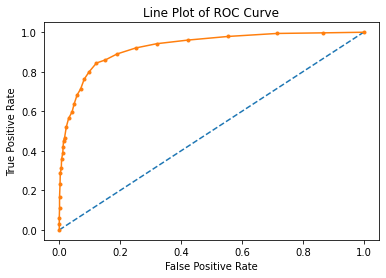

In [204]:
# find optimal_k using brute approach for tfidf vectorization
KNN(tfidf_train,tfidf_cv,Y_tr,Y_cv,'brute')

AUC Score 0.9200993358020337


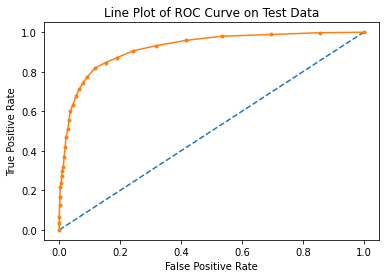

f1 score for data : 0.6918056562726613
hamming loss for data: 0.11210762331838565
Precision recall report for data:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93      2996
           1       0.82      0.60      0.69       795

    accuracy                           0.89      3791
   macro avg       0.86      0.78      0.81      3791
weighted avg       0.88      0.89      0.88      3791



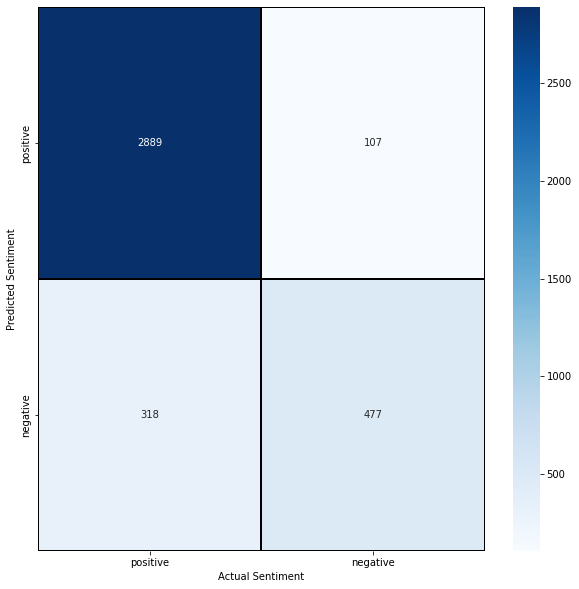

In [206]:
#using optimal k=29 for testing
testing(tfidf_train,Y_tr,tfidf_test,Y_test,'brute',optimal_k=29)

In [230]:
# Here I have displayed how the KNN performed for both BOW and TF-IDF Vectorizations
from IPython.display import display
 # intialise data of lists.
results = {'Category':['BOW Vectorization','TF-IDF Vectorization'],
        'AUC Score':AUC,
        'F1-Score':F1}
#results = pd.DataFrame(results)
 
# Print the output.
display(results)      

{'AUC Score': [0.89, 0.89, 0.92],
 'Category': ['BOW Vectorization', 'TF-IDF Vectorization'],
 'F1-Score': [0.68, 0.67, 0.69]}

In [209]:
df.head()

,airline_sentiment,text,Sentiment
0,positive,"['virginamerica', 'plus', 'add', 'commercials'...",1
1,negative,"['virginamerica', 'really', 'aggressive', 'bla...",0
2,negative,"['virginamerica', 'really', 'big', 'bad', 'thi...",0
3,negative,"['virginamerica', 'seriously', 'would', 'pay',...",0
4,positive,"['virginamerica', 'yes', 'nearly', 'every', 't...",1


## **7. Conclusion**
- Summary from the understanding of the application of Various Pre-processing, Vectorization, and performance of the model on the dataset.

- We observe that KNN model has 89% on AUC Score using BOW vectorization and TF-IDF Vectorization. On F1 Score, our model accuracy drops to 68%. We could improve our model accuracy and generalization on yet unseen data by resampling the target class distribution and trying other classifiers such as Random Forest or even CNN. 